M. Revaldi Sapta Wiguna
231011400499
05 TPLE 004


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived

/tmp/ipython-input-1315506681.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-1315506681.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

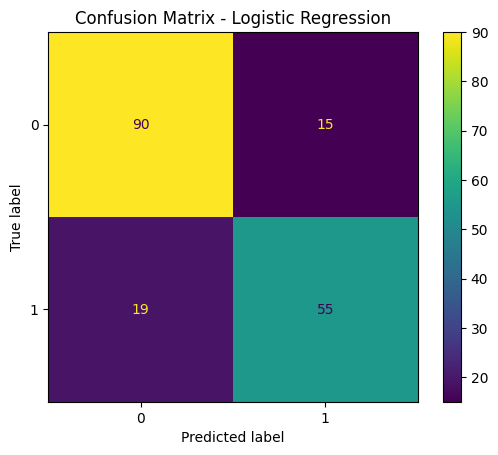


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



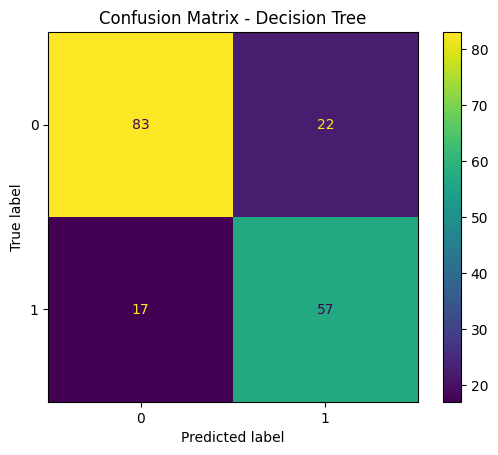

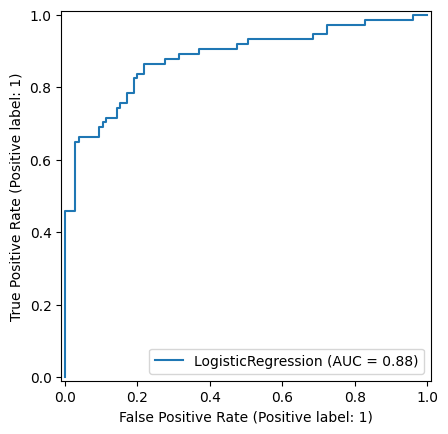

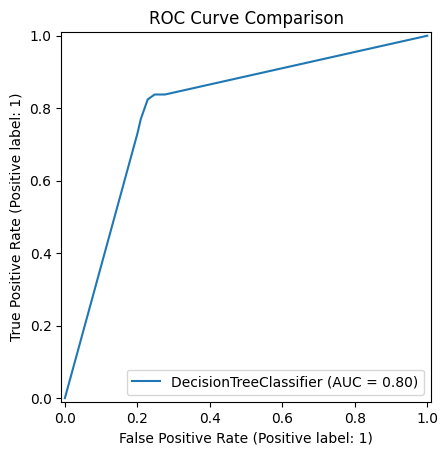


=== Perbandingan Model ===
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.810056   0.785714  0.743243  0.763889
1        Decision Tree  0.782123   0.721519  0.770270  0.745098


In [1]:
# --- 1. Import Library ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# --- 2. Load Dataset ---
df = sns.load_dataset("titanic")
print(df.head())
print("\nInfo dataset:")
print(df.info())

# --- 3. EDA Sederhana ---
print("\nCek missing values:")
print(df.isnull().sum())

# ambil kolom penting aja biar simple
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

# isi missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# ubah kategorikal jadi numerik
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])

# --- 4. Split Data ---
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 5. Modeling ---
logreg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)

logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)

# --- 6. Prediksi ---
y_pred_log = logreg.predict(X_test)
y_pred_dt = dt.predict(X_test)

# --- 7. Evaluasi ---
print("\n=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

print("\n=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# --- 8. ROC Curve ---
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.title("ROC Curve Comparison")
plt.show()

# --- 9. Perbandingan Akurasi ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_dt)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_dt)
    ],
    'F1-score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_dt)
    ]
}

result = pd.DataFrame(metrics)
print("\n=== Perbandingan Model ===")
print(result)
